# Customer Churn Prediction

## Setup

### Imports

In [20]:
import pandas as pd
from dotenv import load_dotenv
import kagglehub

### Data

In [21]:
path = kagglehub.dataset_download("dhairyajeetsingh/ecommerce-customer-behavior-dataset")
print("Path to dataset files:", path)

Path to dataset files: C:\Users\kaiod\.cache\kagglehub\datasets\dhairyajeetsingh\ecommerce-customer-behavior-dataset\versions\1


In [22]:
ecommerce_df = pd.read_csv(f"{path}/ecommerce_customer_churn_dataset.csv")
ecommerce_df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned,Signup_Quarter
0,43.0,Male,France,Marseille,2.9,14.0,27.4,6.0,50.6,3.0,...,17.9,9.0,4.0,16.3,20.8,1.0,953.33,2278.0,0,Q1
1,36.0,Male,UK,Manchester,1.6,15.0,42.7,10.3,37.7,1.0,...,42.8,7.0,3.0,NaN,23.3,3.0,1067.47,3028.0,0,Q4
2,45.0,Female,Canada,Vancouver,2.9,10.0,24.8,1.6,70.9,1.0,...,0.0,4.0,1.0,NaN,8.8,NaN,1289.75,2317.0,0,Q4
3,56.0,Female,USA,New York,2.6,10.0,38.4,14.8,41.7,9.0,...,41.4,2.0,5.0,85.9,31.0,3.0,2340.92,2674.0,0,Q1
4,35.0,Male,India,Delhi,3.1,29.0,51.4,NaN,19.1,9.0,...,37.9,1.0,11.0,83.0,50.4,4.0,3041.29,5354.0,0,Q4


## Defining the scenario

SwiftCart, a mid-sized global e-commerce platform specializing in consumer electronics, has observed a steady increase in customer churn. While the company remains effective at acquiring new users, the rising Cost of Acquisition (CAC) has become a significant financial challenge.

To stabilize revenue growth and protect the bottom line, a new Marketing & Retention Department was established. Led by a data-driven executive, the department's mission is to pivot from intuition-based tactics to evidence-based strategies. Consequently, the Data Science team was tasked with developing a Customer Churn Prediction Model.

Currently, the Marketing & Retention team operates reactively. They typically offer discounts or win-back incentives only after a customer has already stopped using the platform or unsubscribed. At that stage, retention efforts are often too late and yield low conversion rates.

The goal of this project is to get ahead of the problem. By predicting which customers are at high risk of leaving, SwiftCart can intervene with personalized engagement strategies before the churn occurs, maximizing the chance of retention and increasing the overall Customer Lifetime Value (CLV).

### Objectives
- Make a model that predicts wheter or not a customer will churn.


### Solution Framework

To solve the business needs, a customer churn prediction model is required. This is typically a **Classification** problem, which is a classical **Supervised Learning** scenario.

For now, customer behavior regarding churn doesn't seem to change over time, so the M&R department doesn't need an online solution; therefore, we'll make an **Offline (batch)**  model.

To measure our model efficiency, we are interested in its **Recall Score**. We want to capture the maximum amount of customers that will churn. The model **Precision** is also an interesting metric to take a look at, since we don't want to distribute retention benefits to people who wouldn't churn. There is one metric that mixes both the metrics already shown: the **F1-Score**. Because of that property, we'll evaluate our model with the **F1-Score**.

To achieve a positive ROI, the model targeted an F1-Score above 0.65.

- Business Impact: This balance ensures that we capture at least 70% of potential churners (Recall) while maintaining a Precision of at least 60%, preventing the marketing budget from being exhausted on customers who had no intention of leaving.

## Data Split

To avoid any data leakage, the first step is to split the data into train, test and validation sets.

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = ecommerce_df.drop('Churned', axis = 'columns')
y = ecommerce_df.Churned

In [25]:
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.30, random_state=42, stratify=y
)

X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

train_data_df = pd.concat([X_train, y_train], axis = 1)

## Data Cleaning and Preparation

### Looking at the data

In [26]:
train_data_df.shape

(35000, 25)

In [27]:
train_data_df.head()

,Age,Gender,Country,City,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,...,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Signup_Quarter,Churned
168,35.0,Male,UK,London,1.9,7.0,13.5,6.5,57.9,3.0,...,11.3,3.0,NaN,6.2,12.4,2.0,859.21,2365.0,Q3,0
4178,59.0,Male,USA,Los Angeles,1.9,9.0,NaN,8.1,64.1,2.0,...,7.6,7.0,4.0,32.9,15.1,3.0,903.87,3058.0,Q1,0
40124,54.0,Female,UK,Birmingham,2.4,18.0,35.1,8.7,39.6,8.0,...,23.4,9.0,4.0,NaN,27.3,3.0,1814.69,1598.0,Q4,0
43650,18.0,Male,Japan,Tokyo,4.3,4.0,15.7,10.7,77.1,0.0,...,1.5,3.0,2.0,32.3,16.8,2.0,879.95,2176.0,Q1,1
20514,27.0,Male,UK,Manchester,2.0,17.0,44.1,12.1,44.7,3.0,...,33.4,3.0,3.0,80.3,33.8,2.0,2596.40,NaN,Q1,0


In [28]:
train_data_df.columns

Index(['Age', 'Gender', 'Country', 'City', 'Membership_Years',
       'Login_Frequency', 'Session_Duration_Avg', 'Pages_Per_Session',
       'Cart_Abandonment_Rate', 'Wishlist_Items', 'Total_Purchases',
       'Average_Order_Value', 'Days_Since_Last_Purchase',
       'Discount_Usage_Rate', 'Returns_Rate', 'Email_Open_Rate',
       'Customer_Service_Calls', 'Product_Reviews_Written',
       'Social_Media_Engagement_Score', 'Mobile_App_Usage',
       'Payment_Method_Diversity', 'Lifetime_Value', 'Credit_Balance',
       'Signup_Quarter', 'Churned'],
      dtype='object')

In [29]:
train_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35000 entries, 168 to 5630
Data columns (total 25 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            33279 non-null  float64
 1   Gender                         35000 non-null  object 
 2   Country                        35000 non-null  object 
 3   City                           35000 non-null  object 
 4   Membership_Years               35000 non-null  float64
 5   Login_Frequency                35000 non-null  float64
 6   Session_Duration_Avg           32621 non-null  float64
 7   Pages_Per_Session              32931 non-null  float64
 8   Cart_Abandonment_Rate          35000 non-null  float64
 9   Wishlist_Items                 32194 non-null  float64
 10  Total_Purchases                35000 non-null  float64
 11  Average_Order_Value            35000 non-null  float64
 12  Days_Since_Last_Purchase       32901 non-null  flo

In [30]:
train_data_df.describe()

,Age,Membership_Years,Login_Frequency,Session_Duration_Avg,Pages_Per_Session,Cart_Abandonment_Rate,Wishlist_Items,Total_Purchases,Average_Order_Value,Days_Since_Last_Purchase,...,Returns_Rate,Email_Open_Rate,Customer_Service_Calls,Product_Reviews_Written,Social_Media_Engagement_Score,Mobile_App_Usage,Payment_Method_Diversity,Lifetime_Value,Credit_Balance,Churned
count,33279.000000,35000.000000,35000.000000,32621.000000,32931.000000,35000.000000,32194.000000,35000.000000,35000.000000,32901.000000,...,31826.000000,33178.000000,34868.000000,32581.000000,30843.000000,31471.000000,33258.000000,35000.000000,31195.000000,35000.000000
mean,37.796148,2.978073,11.628743,27.686003,8.733285,57.073563,4.282164,13.111037,123.755923,29.805538,...,6.695254,20.926053,5.677498,2.850158,29.425189,19.376829,2.354080,1439.670343,1968.084340,0.289000
std,11.873131,2.052820,7.812486,10.881385,3.776790,16.267626,3.174497,7.056685,189.175161,29.690830,...,6.197316,14.258905,2.670801,2.332850,20.634359,9.411506,1.108976,909.570603,1225.459745,0.453304
min,5.000000,0.100000,0.000000,1.000000,1.000000,0.000000,0.000000,-13.000000,26.380000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,29.000000,1.400000,6.000000,19.700000,6.000000,46.475000,2.000000,8.000000,87.000000,9.000000,...,2.900000,9.800000,4.000000,1.000000,13.200000,12.600000,2.000000,785.235000,1048.000000,0.000000
50%,38.000000,2.500000,11.000000,26.800000,8.400000,58.100000,4.000000,12.000000,113.050000,21.000000,...,5.400000,19.700000,5.000000,2.000000,27.600000,18.600000,2.000000,1238.565000,1894.000000,0.000000
75%,46.000000,4.000000,17.000000,34.800000,11.200000,68.700000,6.000000,17.000000,144.420000,41.000000,...,9.100000,30.400000,7.000000,4.000000,43.100000,25.500000,3.000000,1873.887500,2801.000000,1.000000
max,200.000000,10.000000,44.000000,75.600000,23.900000,143.743350,23.000000,128.700000,9666.379178,283.000000,...,99.615734,91.700000,21.000000,21.000000,100.000000,57.100000,5.000000,8243.530000,7197.000000,1.000000


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'Membership_Years'}>,
        <Axes: title={'center': 'Login_Frequency'}>,
        <Axes: title={'center': 'Session_Duration_Avg'}>,
        <Axes: title={'center': 'Pages_Per_Session'}>],
       [<Axes: title={'center': 'Cart_Abandonment_Rate'}>,
        <Axes: title={'center': 'Wishlist_Items'}>,
        <Axes: title={'center': 'Total_Purchases'}>,
        <Axes: title={'center': 'Average_Order_Value'}>,
        <Axes: title={'center': 'Days_Since_Last_Purchase'}>],
       [<Axes: title={'center': 'Discount_Usage_Rate'}>,
        <Axes: title={'center': 'Returns_Rate'}>,
        <Axes: title={'center': 'Email_Open_Rate'}>,
        <Axes: title={'center': 'Customer_Service_Calls'}>,
        <Axes: title={'center': 'Product_Reviews_Written'}>],
       [<Axes: title={'center': 'Social_Media_Engagement_Score'}>,
        <Axes: title={'center': 'Mobile_App_Usage'}>,
        <Axes: title={'center': 'Payment_Method_Div

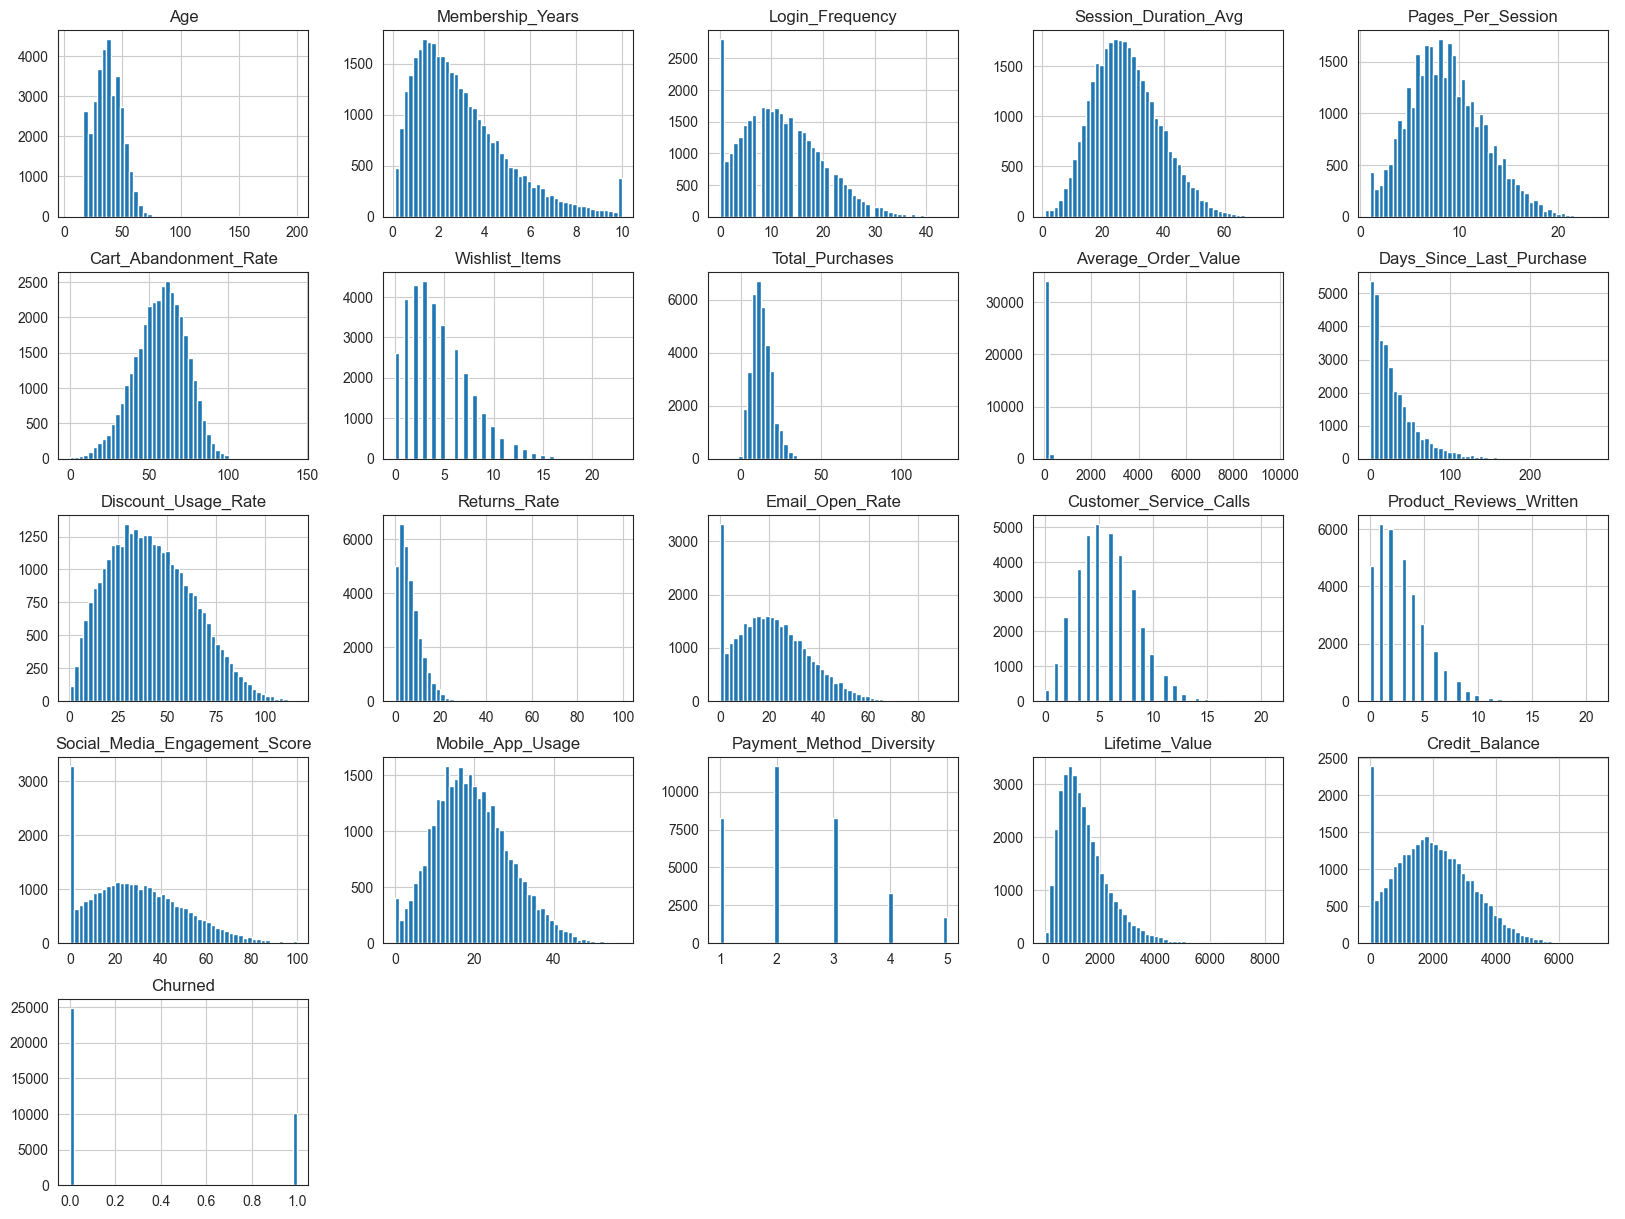

In [31]:
train_data_df.hist(bins = 50, figsize=(20,15))

Some key informations we got from this initial look at the data:
- Some columns, such as Age, Session_Duration_Avg, Pages_Per_Session, Wishlist_Items, Days_Since_Last_Purchase, Discount_Usage_Rate, Returns_Rate, Email_Open_Rate, Customer_Service_Calls, Product_Reviews_Written, Social_Media_Engagement_Score, Mobile_App_Usage, Payment_Method_Diversity and Credit_Balance have some rows that are empty.
- The Total_Purchases column has some rows with negative values. It's not possible to someone to purchase a number times lesser than zero.
- Some columns also have outliers.

Let's take a look at each column mentioned above to clean it.

### Data Cleaning

#### Age
The column "Age" has some missing values. Besides that, the column also has some values that doesn't make sense. The describe method used before showed us that. Let's call it again:

In [32]:
train_data_df.Age.describe()

count    33279.000000
mean        37.796148
std         11.873131
min          5.000000
25%         29.000000
50%         38.000000
75%         46.000000
max        200.000000
Name: Age, dtype: float64

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
sns.set_style('white')

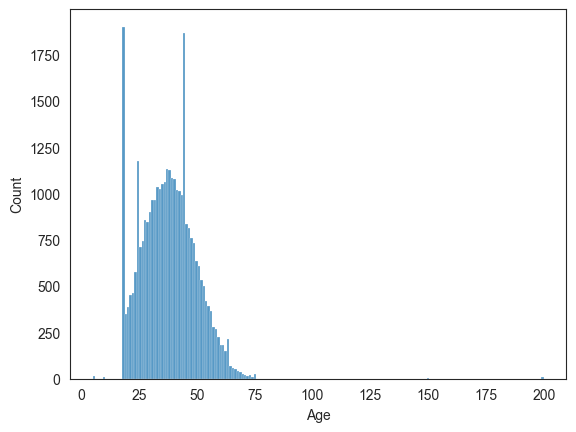

In [35]:
sns.histplot(train_data_df, x = 'Age')
plt.show()

We can see that the min value of the column is 5 years. It's plausible to assume that this information is an error, since our platform doesn't accept orders from clients that are younger than 18 years.

Another issue is with the max value of age being 200 years. It's also not possible for someone to have 200 years.

For that column, we'll fill the missing values and replace ages outside the interval of 18 and 100 years for the age median. That approach will be used for us not to lose another information on these rows.

In [36]:
median = train_data_df.loc[(train_data_df['Age'] >= 18) & (train_data_df['Age'] <= 100), 'Age'].median()

age_analysis_df = train_data_df.Age.fillna(median)
age_analysis_df.Age = train_data_df.Age.apply(lambda x : median if (x < 18 or x > 100) else x)
age_analysis_df.Age.describe()

count    33279.000000
mean        37.758166
std         11.477446
min         18.000000
25%         29.000000
50%         38.000000
75%         46.000000
max         75.000000
Name: Age, dtype: float64

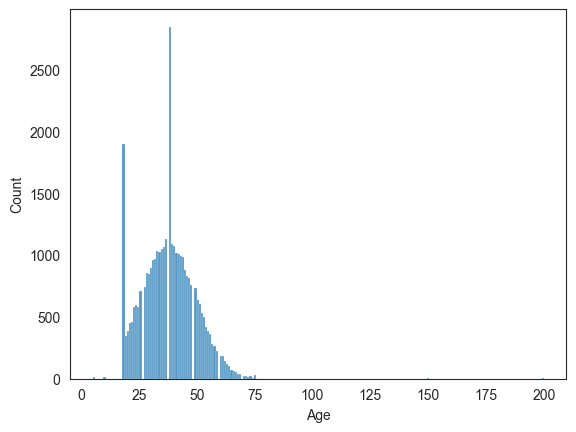

In [37]:
sns.histplot(age_analysis_df)
plt.show()

To better reproduce that treatment on future training data and on the test and validation data, we'll create a custom transformer from scikit-learn.

In [38]:
from sklearn.base import BaseEstimator, TransformerMixin

class Age_cleaning_transformer (BaseEstimator, TransformerMixin):
    def __init__(self, min_age=18, max_age=100):
        self.min_age = min_age
        self.max_age = max_age
        self.median_age_ = None

    def fit(self, X, y=None):
        valid_ages = X.loc[(X['Age'] >= self.min_age) & (X['Age'] <= self.max_age), 'Age']
        self.median_age_ = valid_ages.median()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy['Age'] = X_copy['Age'].mask(
            (X_copy['Age'] < self.min_age) | (X_copy['Age'] > self.max_age), 
            self.median_age_
        )
        X_copy['Age'] = X_copy['Age'].fillna(self.median_age_)
        return X_copy

We can them test our transformer in the train dataframe

In [39]:
age_transformer = Age_cleaning_transformer(18, 100)
age_transformer.fit(X_train)
transformer_test_X = age_transformer.transform(X_train)

transformer_test_X.Age.describe()

count    35000.000000
mean        37.770057
std         11.191822
min         18.000000
25%         30.000000
50%         38.000000
75%         45.000000
max         75.000000
Name: Age, dtype: float64

#### Session_Duration_Avg

We can also see that the "Session_Duration_Avg" column has some missing values. We can also plot the histogram of the column again to take a closer look to outlliers.

In [40]:
train_data_df.Session_Duration_Avg.describe()

count    32621.000000
mean        27.686003
std         10.881385
min          1.000000
25%         19.700000
50%         26.800000
75%         34.800000
max         75.600000
Name: Session_Duration_Avg, dtype: float64

<Axes: xlabel='Session_Duration_Avg', ylabel='Count'>

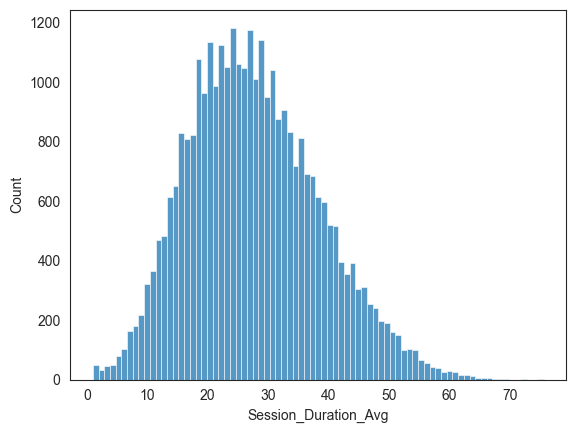

In [41]:
sns.histplot(train_data_df, x = "Session_Duration_Avg")

We can see some suspects off outliers in the right side of the histogram, we can check it with a boxplot.

<Axes: ylabel='Session_Duration_Avg'>

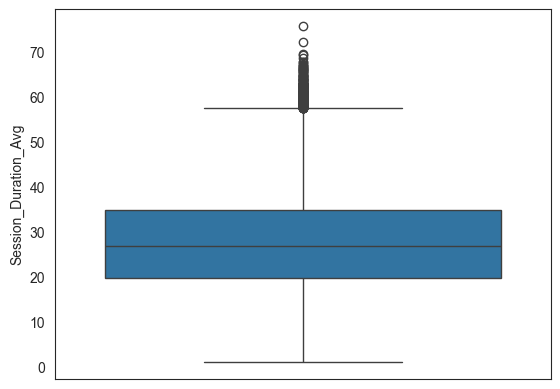

In [42]:
sns.boxplot(train_data_df, y = "Session_Duration_Avg")

The boxplot confirms our suspections, there are, indeed, some outliers on the right side of the histogram. But, different from the "Age" column, this outliers cannot be rulled out as legitmate values. They can also have information if the user will or not churn. So we'll keep this rows, treating only the missing values.

For this column, the best approach is the following: 
- If the user has a "Session_Duration_Avg" empty, we'll check the "Total_Purchase" column, if the column has a value lesser or equal to 0, we'll set "Session_Duration_Avg" to 0. If not, them "Session_Duration_Avg" will be set to the median.

In [43]:
class Session_duration_avg_transformer (BaseEstimator, TransformerMixin):
    def __init__(self):
        self.median_session_duration_avg_ = None

    def fit(self, X, y=None):
        valid_purchases = X[(X["Session_Duration_Avg"].notna())]
        self.median_session_duration_avg_ = valid_purchases["Session_Duration_Avg"].median()
        return self

    def transform(self, X):
        X_copy = X.copy()
        X_copy["Session_Duration_Avg"] = X_copy["Session_Duration_Avg"].mask(
            (X_copy["Session_Duration_Avg"] == 0) & (X_copy["Total_Purchases"] > 0), 
            self.median_session_duration_avg_
        )
        X_copy["Session_Duration_Avg"] = X_copy["Session_Duration_Avg"].fillna(0)
        return X_copy

In [44]:
session_duration_transformer = Session_duration_avg_transformer()
session_duration_transformer.fit(X_train)

transformer_test_X = session_duration_transformer.transform(transformer_test_X)
transformer_test_X.Session_Duration_Avg.describe()

count    35000.000000
mean        25.804146
std         12.606240
min          0.000000
25%         18.000000
50%         25.800000
75%         34.100000
max         75.600000
Name: Session_Duration_Avg, dtype: float64

#### Pages_Per_Session